In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

%matplotlib inline
plt.style.use('seaborn')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Upload DATA
train_set = pd.read_csv('drive/My Drive/DATA/titanic/train.csv')
test_set = pd.read_csv('drive/My Drive/DATA/titanic/test.csv')
test_labels = pd.read_csv('drive/My Drive/DATA/titanic/gender_submission.csv')

**Look for datatype info and non-null**

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
report = pandas_profiling.ProfileReport(train_set)
report.to_file("report_train_set.html")

In [5]:
matrix_corr = train_set.corr()
matrix_corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [21]:
matrix_corr.style.background_gradient(cmap='coolwarm', axis=None)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.035144,0.0368472,-0.0575268,-0.00165201,0.0126582
Survived,-0.00500666,1,-0.338481,-0.0772211,-0.0353225,0.0816294,0.257307
Pclass,-0.035144,-0.338481,1,-0.369226,0.0830814,0.0184427,-0.5495
Age,0.0368472,-0.0772211,-0.369226,1,-0.308247,-0.189119,0.0960667
SibSp,-0.0575268,-0.0353225,0.0830814,-0.308247,1,0.414838,0.159651
Parch,-0.00165201,0.0816294,0.0184427,-0.189119,0.414838,1,0.216225
Fare,0.0126582,0.257307,-0.5495,0.0960667,0.159651,0.216225,1


In [6]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


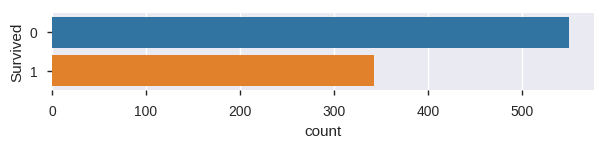

In [37]:
fig = plt.figure(figsize=(7, 1))
sns.countplot(y='Survived', data=train_set)

##PClass

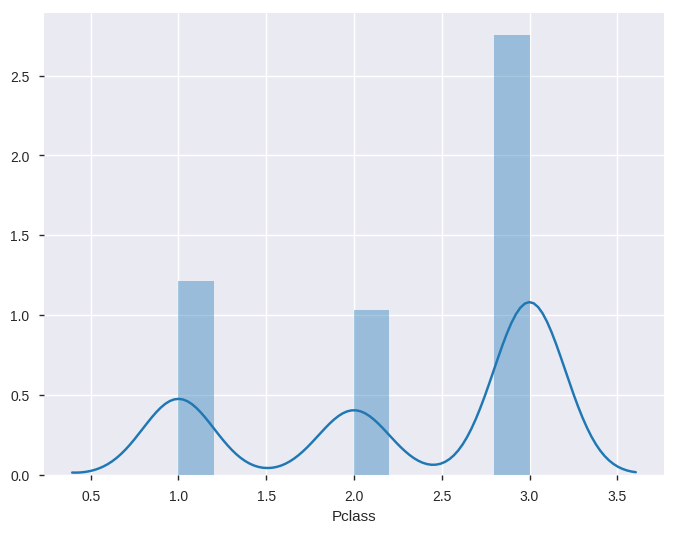

In [42]:
fig = plt.figure(figsize=(8, 6))
sns.distplot(train_set['Pclass'])

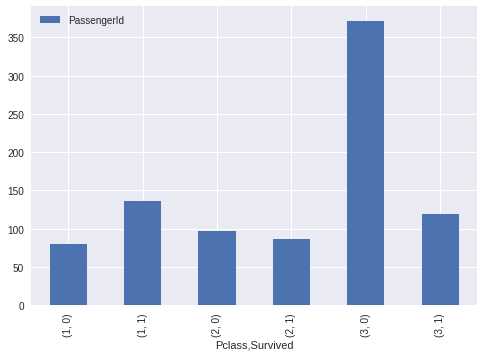

In [44]:
# Bar (class, Survived)
data_plot = train_set.groupby(['Pclass', 'Survived']).count()
data_plot[['PassengerId']].plot(kind='bar')

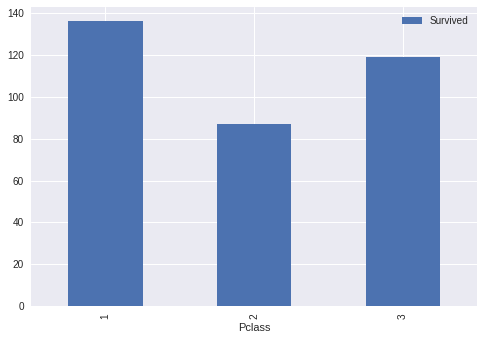

In [45]:
data = train_set[['Pclass', 'Survived']].groupby('Pclass', axis=0).sum()

data.plot(kind='bar', )

##Sex


In [9]:
sex_set = train_set[['Sex', 'Survived']].head()
sex_set[sex_set=='female'].sum()['Survived']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0.0

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

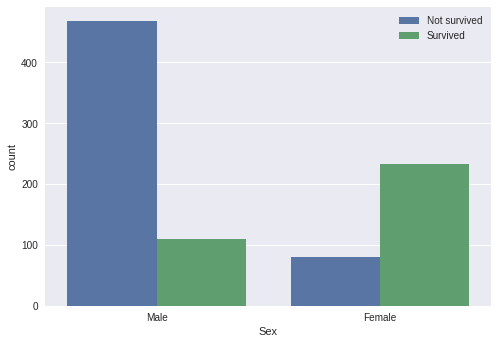

In [56]:
x = train_set['Sex']
y = train_set['Survived']

fig = sns.countplot(x='Sex', hue='Survived', data=train_set, )
fig.legend(['Not survived', 'Survived'])
fig.set_xticklabels(['Male', 'Female'])


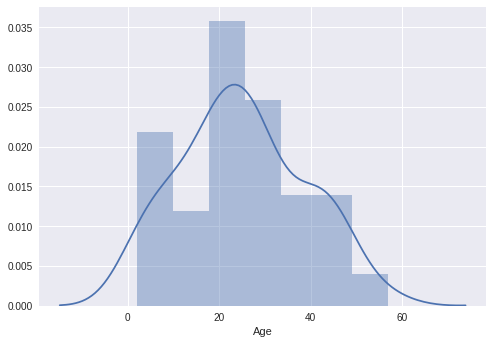

In [64]:
female_set = train_set[train_set['Sex']=='female']
male_set = train_set[train_set['Sex']=='male']
figure, ax = plt.subplots(1, 1)

#female_set.plot(kind='hist', x='Survived', y='Age', bins=20, alpha=0.3, ax=ax, label='female')
#male_set.plot(kind='hist', x='Survived', y='Age', bins=20, alpha=0.2, ax=ax, label='male')

fig = sns.distplot(female_set[female_set['Survived']==0]['Age'].dropna(), ax=ax)

##Age

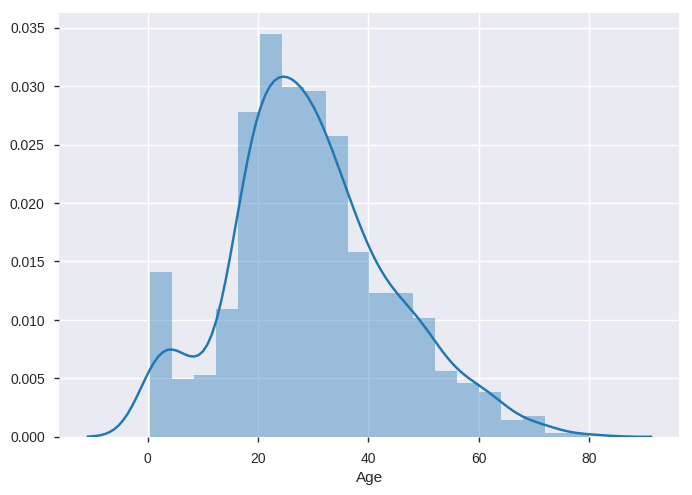

In [32]:
sns.distplot(train_set['Age'].dropna())

##SibSp

   SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5


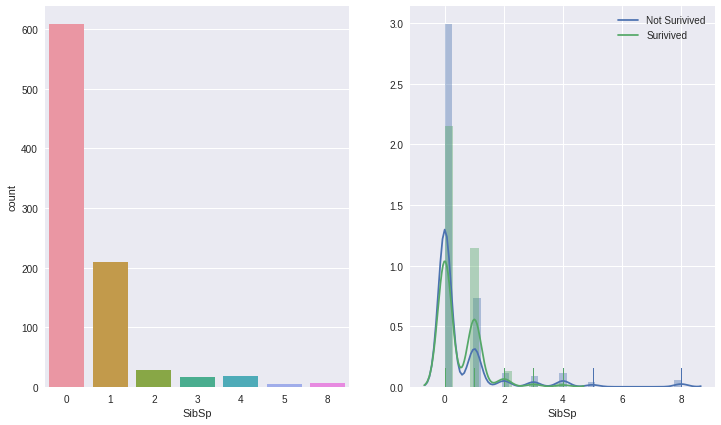

In [128]:
print(train_set['SibSp'].value_counts().to_frame())
fig = plt.figure(figsize=(12, 7))
plt.subplot(121)
sns.countplot(x='SibSp', data=train_set)
plt.subplot(122)
sns.distplot(train_set.loc[train_set['Survived']==0]['SibSp'], rug=True, kde_kws={'label': 'Not Surivived'})
sns.distplot(train_set.loc[train_set['Survived']==1]['SibSp'], rug=True, kde_kws={'label': 'Surivived'})

In [122]:
pd.pivot_table(train_set, values='Survived', index='SibSp', columns=train_set['Survived'], aggfunc='count', fill_value=0)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


##Parch

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


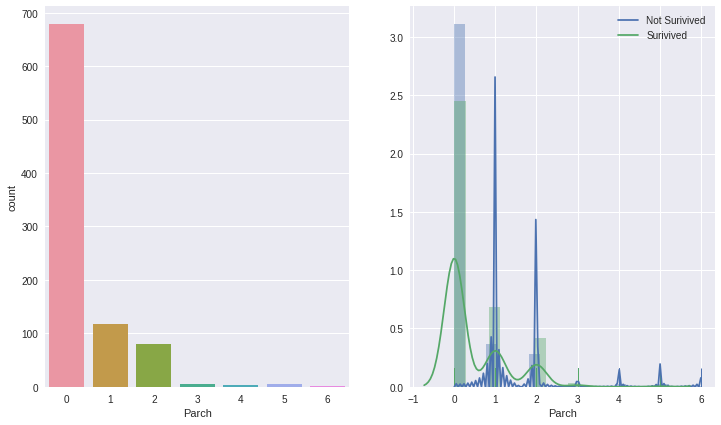

In [86]:
print(train_set['Parch'].value_counts())
fig = plt.figure(figsize=(12, 7))
plt.subplot(121)
sns.countplot(x='Parch', data=train_set)
plt.subplot(122)
sns.distplot(train_set.loc[train_set['Survived']==0]['Parch'], rug=True, kde_kws={'label': 'Not Surivived'})
sns.distplot(train_set.loc[train_set['Survived']==1]['Parch'], rug=True, kde_kws={'label': 'Surivived'})